In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Reading the Dataset
df = pd.read_csv("/content/526_data_pointsN.csv")
df = df.iloc[100:]
df = df.iloc[:-100]
df.head()

,cycles,instructions,branch-misses,cache-misses,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.code_rd_miss,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss,IPC,CPI
100,2202489761,3236010413,17443245,11688888,36198743,59260145,1370966,1434918,16693781,267601,242716,446915,11032975,5107554,17091864,1.47,0.680619
101,2080419037,3014288477,17846322,9866796,34414151,48739117,1074180,1307045,18948699,290816,146596,375690,10866756,4355720,17007573,1.45,0.690186
102,2273893169,3534715840,23462931,8936578,38098272,57531975,906377,919047,23745112,301200,113102,375856,15599138,3907958,21653722,1.55,0.643303
103,2187880116,3315620218,23550471,9173531,36394239,54920977,923152,887698,22675476,263018,140598,410080,14295007,3624428,21659905,1.52,0.659871
104,2258109451,3472976790,22777842,9758767,38273836,56467486,982783,1066811,22268168,319476,119126,369259,12631580,5069417,19775215,1.54,0.650194


In [ ]:
df.shape

(1271, 17)

In [ ]:
#Setting the value for X and Y
X = df[['branch-misses', 'cache-misses', 'L1-dcache-load-misses', 'L1-icache-load-misses', 'LLC-load-misses', 'LLC-store-misses', 'branch-load-misses', 'dTLB-load-misses', 'dTLB-store-misses', 'iTLB-load-misses', 'l2_rqsts.code_rd_miss', 'l2_rqsts.demand_data_rd_miss', 'l2_rqsts.all_demand_miss']]
i = df['instructions'].values.reshape(-1,1)
y = df['CPI']
X = np.divide(X,i)
df_new = X.copy()
df_new['CPI'] = y

<Axes: >

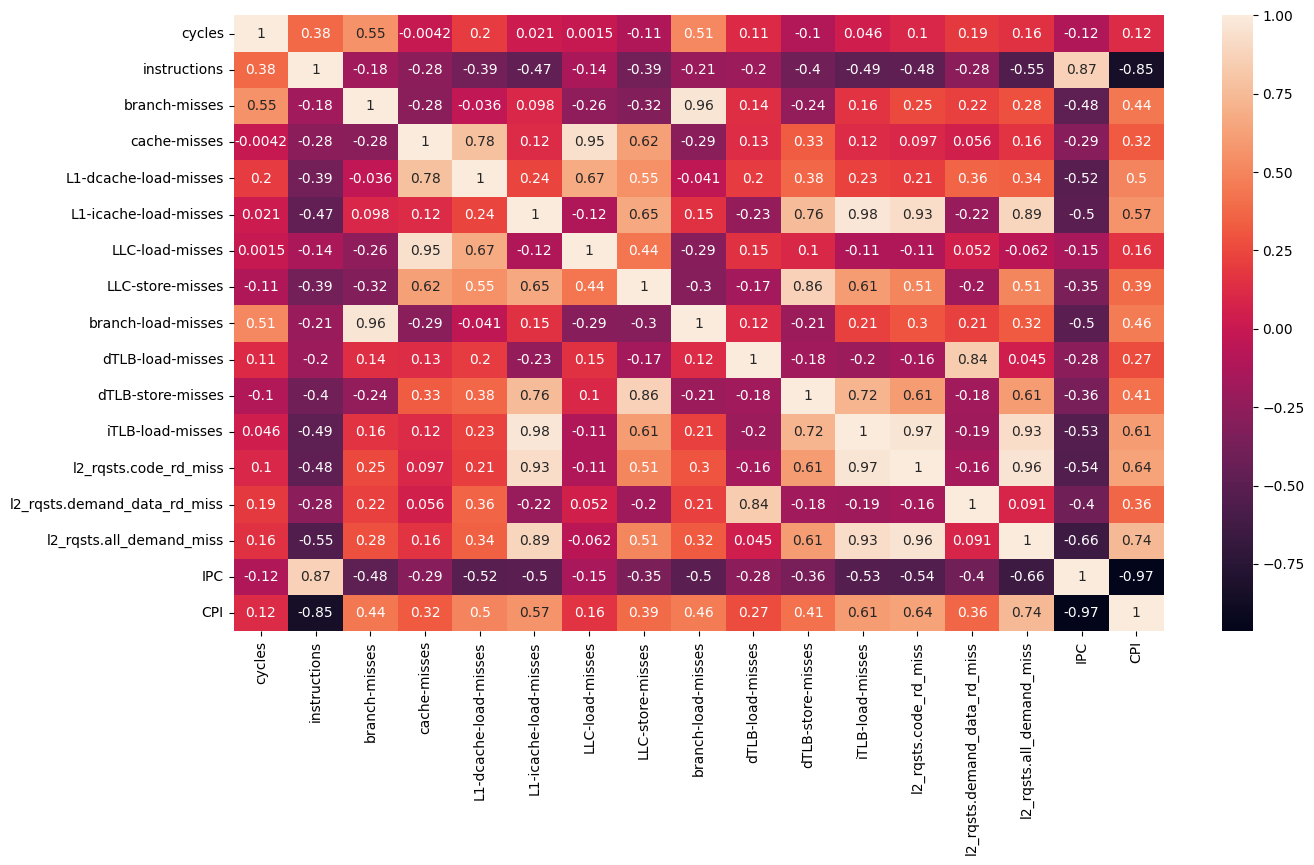

In [ ]:
corr = df.corr()
plt.figure (figsize = (15,8))
sns.heatmap(corr, annot = True)

In [ ]:
print(df.columns.values.tolist())

['cycles', 'instructions', 'branch-misses', 'cache-misses', 'L1-dcache-load-misses', 'L1-icache-load-misses', 'LLC-load-misses', 'LLC-store-misses', 'branch-load-misses', 'dTLB-load-misses', 'dTLB-store-misses', 'iTLB-load-misses', 'l2_rqsts.code_rd_miss', 'l2_rqsts.demand_data_rd_miss', 'l2_rqsts.all_demand_miss', 'IPC', 'CPI']


In [ ]:
X.drop(['LLC-store-misses','branch-load-misses','l2_rqsts.code_rd_miss','LLC-load-misses','dTLB-load-misses','L1-icache-load-misses'],axis=1,inplace = True)
X.head()

,branch-misses,cache-misses,L1-dcache-load-misses,dTLB-store-misses,iTLB-load-misses,l2_rqsts.demand_data_rd_miss,l2_rqsts.all_demand_miss
100,0.005390,0.003612,0.011186,0.000075,0.000138,0.001578,0.005282
101,0.005921,0.003273,0.011417,0.000049,0.000125,0.001445,0.005642
102,0.006638,0.002528,0.010778,0.000032,0.000106,0.001106,0.006126
103,0.007103,0.002767,0.010977,0.000042,0.000124,0.001093,0.006533
104,0.006559,0.002810,0.011020,0.000034,0.000106,0.001460,0.005694


In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()

In [ ]:
#Splitting dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
mlr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.27047848147962467
Coefficients:


[('branch-misses', 37.813429306942574),
 ('cache-misses', 5.39227382013639),
 ('L1-dcache-load-misses', 2.8441824012383705),
 ('dTLB-store-misses', 353.844863790132),
 ('iTLB-load-misses', 170.75028736429695),
 ('l2_rqsts.demand_data_rd_miss', 29.102903403560045),
 ('l2_rqsts.all_demand_miss', 2.6279204798520377)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.57674227 0.6209512  0.43160591 0.53670205 0.52648788 0.40682307
 0.57238949 0.46885556 0.59231434 0.60099698 0.45669826 0.78509328
 0.55395393 0.57901946 0.429498   0.48746812 0.42122042 0.57348964
 0.59829008 0.48721674 0.53591544 0.5711382  0.4305056  0.66488679
 0.46593731 0.50021787 0.48965644 0.47010882 0.50944536 0.46115244
 0.40279624 0.43762773 0.54986327 0.5512829  0.56860529 0.6455065
 0.64625896 0.49774793 0.46470395 0.41813774 0.44467355 0.64016932
 0.57522818 0.3904785  0.50112078 0.52243643 0.45932477 0.59950149
 0.55714614 0.62985672 0.64107047 0.63107315 0.61250466 0.5873853
 0.65791475 0.56498891 0.57941824 0.61808688 0.30942131 0.49831886
 0.59939458 0.60667668 0.61905494 0.43830088 0.41772144 0.42080787
 0.66688321 0.52688057 0.30785967 0.61954424 0.44260333 0.63369975
 0.51155243 0.53508174 0.56264497 0.46011166 0.51928851 0.5819834
 0.55889536 0.64074828 0.71435744 0.62623191 0.44908013 0.44053018
 0.59072257 0.44003617 0.58623287 0.4914

In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
203,0.580626,0.576742
898,0.613582,0.620951
1338,0.388460,0.431606
1264,0.546755,0.536702
871,0.521752,0.526488


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
r2 = mlr.score(X_test,y_test)
print('R squared: {:.2f}'.format(r2*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 93.22
Mean Absolute Error: 0.015992519451526722
Mean Square Error: 0.0006351650957757372
Root Mean Square Error: 0.025202481936819978


In [ ]:
final = X.mean()
R = np.multiply(final,mlr.coef_)
print(R)
print(R.sum()+mlr.intercept_)

branch-misses                   0.177636
cache-misses                    0.010561
L1-dcache-load-misses           0.021212
dTLB-store-misses               0.007202
iTLB-load-misses                0.007735
l2_rqsts.demand_data_rd_miss    0.038154
l2_rqsts.all_demand_miss        0.008234
dtype: float64
0.5412116924070806


In [ ]:
finaly = y.mean()
print(finaly)

0.5411213739866246


In [ ]:
n = df.shape[0]
p = X.shape[1]

In [ ]:
#Adjusted r2
Adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
print(Adjr2)

0.9317904662873451


In [ ]:
#Residuals (added abs for now)
residuals = (y_test - y_pred_mlr)
print(residuals)

203     0.003884
898    -0.007370
1338   -0.043146
1264    0.010053
871    -0.004736
          ...   
847     0.014365
787    -0.015824
1249   -0.003774
1323    0.005731
837    -0.002762
Name: CPI, Length: 382, dtype: float64


In [ ]:
#F statistic
fstat = (r2/(1-r2))*((n-p-1)/p)
print(fstat)

2479.442586654288


In [ ]:
from scipy.stats import f
p_value = 1-f.cdf(fstat,p,n-p-1)
print(p_value)

1.1102230246251565e-16


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted values')]

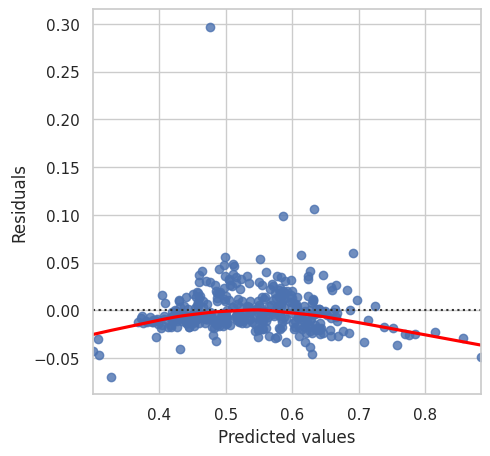

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=y_pred_mlr,y=residuals,ax=ax, lowess=True, line_kws={"color": "red"})
ax.set(ylabel='Residuals',xlabel='Predicted values')

In [ ]:
import pandas as pd
R = pd.concat([pd.Series([mlr.intercept_],index = ['Base CPI']), R])
print(R)

Base CPI                        0.270478
branch-misses                   0.177636
cache-misses                    0.010561
L1-dcache-load-misses           0.021212
dTLB-store-misses               0.007202
iTLB-load-misses                0.007735
l2_rqsts.demand_data_rd_miss    0.038154
l2_rqsts.all_demand_miss        0.008234
dtype: float64


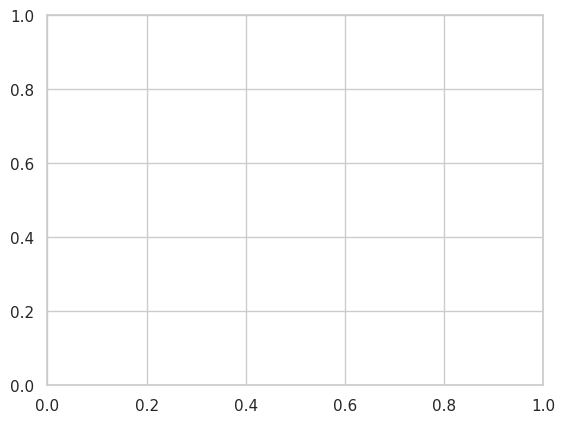

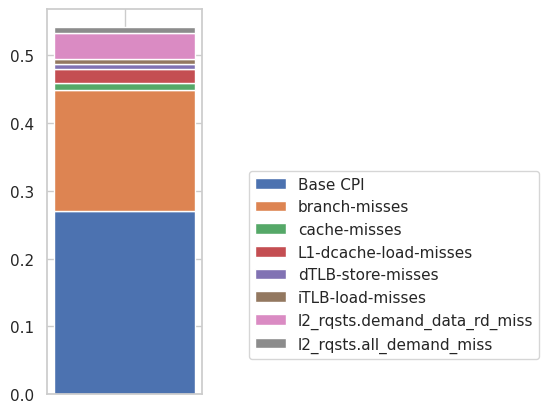

In [ ]:
fig, ax = plt.subplots()
groups = ['']
plt.figure (figsize = (2,5))
# Stacked bar chart with loop
for i in range(len(R)):
  plt.bar(groups, R[i],label = R.index[i], bottom = np.sum(R[:i], axis = 0),width = 0.1)

plt.legend(bbox_to_anchor = (1.25, 0.6), loc='upper left')
plt.tight_layout()